In [47]:
!pip install keras

In [48]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


In [49]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [50]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


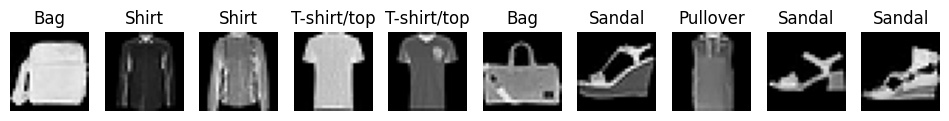

In [56]:
# Définir les noms de classe
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Choisir aléatoirement quelques indices d'images
indices = np.random.choice(train_X.shape[0], 10, replace=False)

# Afficher les images avec les étiquettes correspondantes
plt.figure(figsize=(12, 6))
for i, index in enumerate(indices, 1):
    plt.subplot(1, 10, i)
    plt.imshow(train_X[index], cmap='gray')
    plt.title(class_names[train_Y[index]])
    plt.axis('off')

plt.show()

Text(0.5, 1.0, 'Ground Truth : 9')

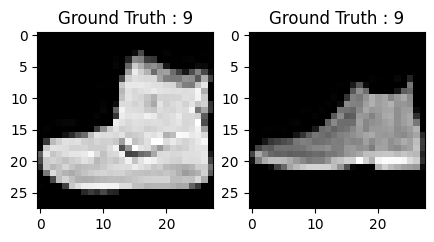

In [32]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


***Prétraitement de données***

In [33]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.



In [34]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [35]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

***Définition de l'architecture de modèle de réseau de neurones convolutifs (CNN)***

In [36]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU


In [37]:
batch_size = 64
epochs = 20
num_classes = 10


In [38]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [39]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [40]:
fashion_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [41]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 120s 158ms/step - loss: 0.4580 - accuracy: 0.8336 - val_loss: 0.3227 - val_accuracy: 0.8811
Epoch 2/20
750/750 [==============================] - 99s 132ms/step - loss: 0.2869 - accuracy: 0.8941 - val_loss: 0.2648 - val_accuracy: 0.9043
Epoch 3/20
750/750 [==============================] - 100s 133ms/step - loss: 0.2383 - accuracy: 0.9114 - val_loss: 0.2619 - val_accuracy: 0.9036
Epoch 4/20
750/750 [==============================] - 97s 129ms/step - loss: 0.2055 - accuracy: 0.9231 - val_loss: 0.2466 - val_accuracy: 0.9082
Epoch 5/20
750/750 [==============================] - 91s 122ms/step - loss: 0.1819 - accuracy: 0.9316 - val_loss: 0.2253 - val_accuracy: 0.9178
Epoch 6/20
750/750 [==============================] - 96s 128ms/step - loss: 0.1578 - accuracy: 0.9402 - val_loss: 0.2245 - val_accuracy: 0.9213
Epoch 7/20
750/750 [==============================] - 99s 132ms/step - loss: 0.1330 - accuracy: 0.9499 - val_loss: 0.2509 - val_

In [43]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [44]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.46398231387138367
Test accuracy: 0.9193000197410583


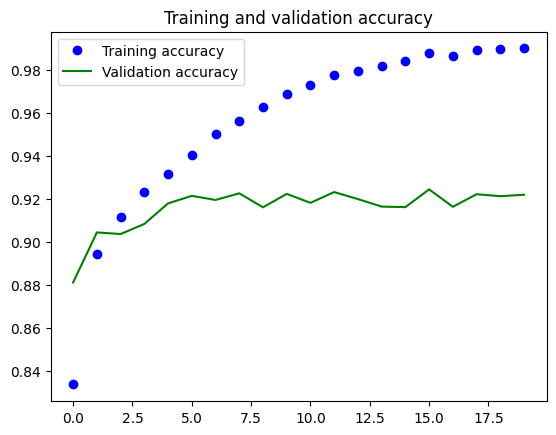

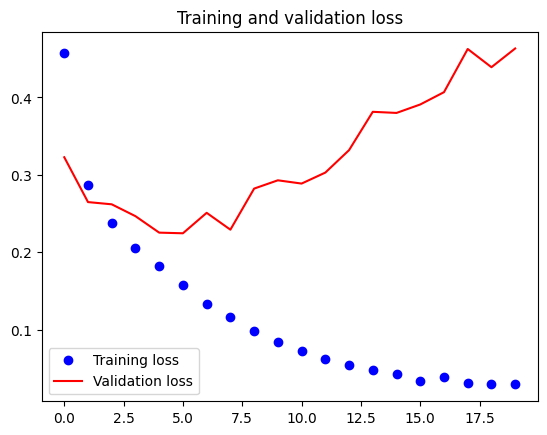

In [57]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()